In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import wget
import openpyxl
import math
import geoplot as gplt
from geodatasets import get_path

Using Geospatial Data from US Census Webiste

In [2]:
#wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")
states = gpd.read_file(os.getcwd()+'/cb_2018_us_state_500k.zip')
states = states.rename({'STUSPS': 'State'}, axis = 1)
states = states.to_crs("EPSG:3395")
states = states[(states.State != 'PR') & (states.State != 'GU') & (states.State != 'VI') & (states.State != 'AS') & (states.State != 'MP')]

states['NAME'].unique()

array(['Mississippi', 'North Carolina', 'Oklahoma', 'Virginia',
       'West Virginia', 'Louisiana', 'Michigan', 'Massachusetts', 'Idaho',
       'Florida', 'Nebraska', 'Washington', 'New Mexico', 'South Dakota',
       'Texas', 'California', 'Alabama', 'Georgia', 'Pennsylvania',
       'Missouri', 'Colorado', 'Utah', 'Tennessee', 'Wyoming', 'New York',
       'Kansas', 'Alaska', 'Nevada', 'Illinois', 'Vermont', 'Montana',
       'Iowa', 'South Carolina', 'New Hampshire', 'Arizona',
       'District of Columbia', 'New Jersey', 'Maryland', 'Maine',
       'Hawaii', 'Delaware', 'Rhode Island', 'Kentucky', 'Ohio',
       'Wisconsin', 'Oregon', 'North Dakota', 'Arkansas', 'Indiana',
       'Minnesota', 'Connecticut'], dtype=object)

In [9]:
beaches = pd.read_csv('data/asbpa_clean.csv')
beaches['Year'] = beaches['Year'].replace({'1951-57': '1951', 
                                           '1959\n': '1959', 
                                           '2018/2019': '2018',
                                           '1940s': '1940',
                                           '1950s': '1950',
                                           '1960s': '1960',
                                           '1970s': '1970',
                                           '1980s': '1980',
                                           '1990s': '1990'})
beaches = beaches[(beaches.Year != 'nan') & (beaches.Year != 'unknown') & (beaches.Year != '1259') & (beaches.Year != 'Pre-1961')]
beaches = beaches.dropna(subset=['Year'])
beaches['Year'] = beaches['Year'].astype(int)
#beaches = beaches.drop(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
#beaches.to_csv('data/asbpa_clean.csv', index = False)

In [10]:
beaches.head(2)

,State,Beach_location,Year,Length_ft,Volume_cy,Sand_source_name,Sand_source_location,Sand_source_type,Latitude,Longitude
0,AK,Ninilchik,2010,NaN,12296.0,NaN,NaN,Nearshore,60.018889,-151.587500
1,AK,Nome Harbor,2010,NaN,25965.0,NaN,NaN,Nearshore,64.497778,-165.431389


In [11]:
beaches = gpd.GeoDataFrame(
    beaches, geometry=gpd.points_from_xy(beaches.Longitude, beaches.Latitude), crs="EPSG:4269"
)

In [12]:
# Check for any remaining empty geometries which could cause the error
empty_geometries = beaches[beaches.geometry.is_empty]
empty_geometries_count = len(empty_geometries)

# If there are no empty geometries, attempt a simple plot, otherwise report the issue
if empty_geometries_count == 0:
    # Attempt a simple plot using geoplot
    import geoplot as gplt
    gplt.pointplot(beaches)
else:
    print(f"Empty geometries found: {empty_geometries_count}")


Empty geometries found: 11


In [8]:
#empty_geometries

,State,Beach_location,Year,Length_ft,Volume_cy,Sand_source_name,Sand_source_location,Sand_source_type,Latitude,Longitude,geometry
367,CA,SANDAG,2001,NaN,NaN,multiple offshore sites,offshore,Offshore,NaN,NaN,POINT EMPTY
368,CA,SANDAG,2012,0.0,NaN,"S06, S05, MB1",Offshore,Offshore,NaN,NaN,POINT EMPTY
1655,HI,"Waikīkī (Kuhio, Queens, Kapiolani)",1951,NaN,150000.0,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2056,MA,South Boston,1965,1255.0,NaN,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2057,MA,South Boston,1982,950.0,NaN,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2058,MA,South Boston,1982,1240.0,NaN,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2059,MA,South Boston,1988,1100.0,NaN,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2060,MA,South Boston,1996,NaN,10600.0,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2061,MA,South Boston,1998,400.0,NaN,NaN,NaN,Unknown,NaN,NaN,POINT EMPTY
2062,MA,South Boston,2006,NaN,22670.0,NaN,upland,Upland,NaN,NaN,POINT EMPTY


In [13]:
beaches = beaches[~beaches.geometry.is_empty]
#beaches = beaches[(beaches.State != 'AK') & (beaches.State != 'HI')]

<Axes: >

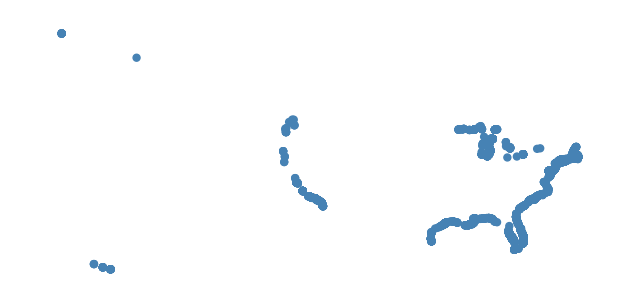

In [14]:
gplt.pointplot(beaches)

In [49]:
#crs = gdp.crs
#crs

In [9]:
# gdf = pd.read_csv('data/gdf_clean.csv')

In [15]:
#asbpa = pd.read_csv('data/grouped_asbpa_states.csv')
beaches = beaches[(beaches['Year'] >= 1950) & (beaches['Year'] <= 2022)]
#beaches = beaches.drop('Unnamed: 0', axis = 1)
beaches.head(2)

,State,Beach_location,Year,Length_ft,Volume_cy,Sand_source_name,Sand_source_location,Sand_source_type,Latitude,Longitude,geometry
0,AK,Ninilchik,2010,NaN,12296.0,NaN,NaN,Nearshore,60.018889,-151.587500,POINT (-151.58750 60.01889)
1,AK,Nome Harbor,2010,NaN,25965.0,NaN,NaN,Nearshore,64.497778,-165.431389,POINT (-165.43139 64.49778)


In [18]:
beaches['State'] = beaches['State'].str.strip().str.upper()
states['State'] = states['State'].str.strip().str.upper()
states_summed = beaches.groupby('State')['Volume_cy'].sum().reset_index()

/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:
states_summed.head(2)

,State,Volume_cy
0,AK,724863.0
1,AL,22714192.0


In [35]:
#gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
#geo_df = gpd.GeoDataFrame(gdf, geometry='geometry')

<Axes: >

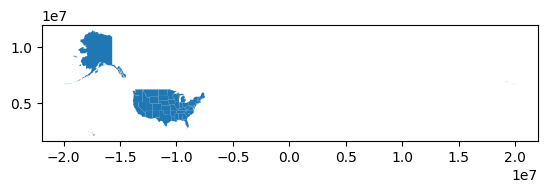

In [58]:
states.plot()

In [51]:
df = pd.merge(states, states_summed, on ='State', how = 'outer')
df['Volume_cy'] = df['Volume_cy'].fillna(0)
df.to_file('data/dataframe.shp')  

In [28]:
df.query('State =="AK"')

,STATEFP,STATENS,AFFGEOID,GEOID,State,NAME,LSAD,ALAND,AWATER,geometry,Volume_cy
26,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((19979896.528 6763338.601, 1998...",724863.0


In [30]:
def makeColorColumn(df,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Wistia)
    df['value_determined_color'] = df[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return df

variable = 'Volume_cy'
vmin, vmax = df.Volume_cy.min(), df.Volume_cy.max()

colormap = "Wistia"
df = makeColorColumn(df,variable,vmin,vmax)
df.set_crs('epsg:4269', allow_override=True)
visframe = df.to_crs({'init':'epsg:2163'})

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [53]:
visframe.to_file('data/visframe.shp') 

/tmp/ipykernel_1499/1196653240.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  visframe.to_file('data/visframe.shp')


In [37]:
visframe.query('State == "AK"')

,STATEFP,STATENS,AFFGEOID,GEOID,State,NAME,LSAD,ALAND,AWATER,geometry,Volume_cy,value_determined_color
26,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((-4288629.145 3426273.868, -428...",724863.0,#e4ff7a


In [39]:
alaska_gdf

,STATEFP,STATENS,AFFGEOID,GEOID,State,NAME,LSAD,ALAND,AWATER,geometry,Volume_cy,value_determined_color
26,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((19979896.528 6763338.601, 1998...",724863.0,#e4ff7a


In [40]:
hawaii_gdf

,STATEFP,STATENS,AFFGEOID,GEOID,State,NAME,LSAD,ALAND,AWATER,geometry,Volume_cy,value_determined_color
39,15,01779782,0400000US15,15,HI,Hawaii,00,16633990195,11777809026,"MULTIPOLYGON (((-17372604.764 2226719.119, -17...",220260.0,#e4ff7a


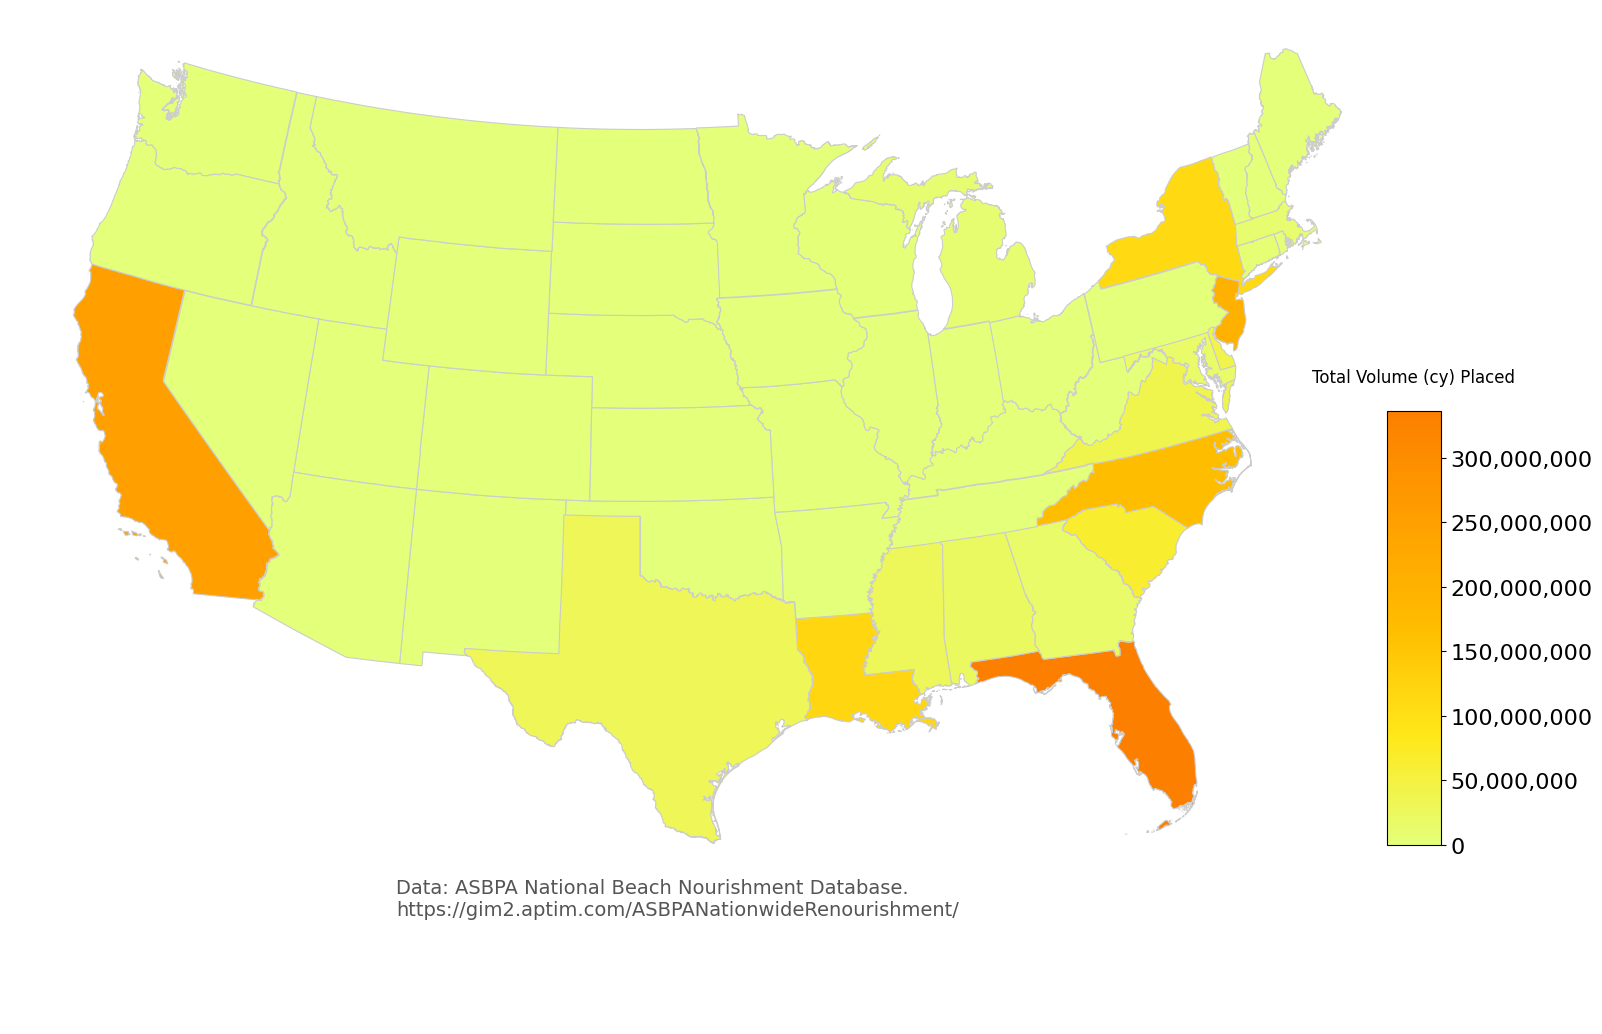

In [50]:


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Total Volume (cy) Placed\n')

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))

# reformat tick labels on legend
sm._A = []
plain_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
fig.colorbar(sm, cax=cbax, format=plain_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
# annotate the data source, date of access, and hyperlink
ax.annotate("Data: ASBPA National Beach Nourishment Database.\nhttps://gim2.aptim.com/ASBPANationwideRenourishment/", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.State not in ['AK','HI']:
        vf = visframe[visframe.State==row.State]
        c = df[df.State==row.State][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# add Alaska
#akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])
#akax.axis('off')
# polygon to clip western islands
#polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
#alaska_gdf = df[df.State=='AK']
#alaska_gdf.clip(polygon).plot(color=df[df.State=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')

# add Hawaii
#hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
#hiax.axis('off')
# polygon to clip western islands
#hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
#hawaii_gdf = df[df.State=='HI']
#hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')

fig.savefig('map_figure.png', dpi=400, bbox_inches = 'tight')  # Save the figure as a PNG file with high resolution
